# PLAY Stock Price with Ryou Yamada

Here's the link if you want to test: https://colab.research.google.com/drive/1B0-osPpNfX1semLgtlYyrpOfu-Pik18T?usp=sharing

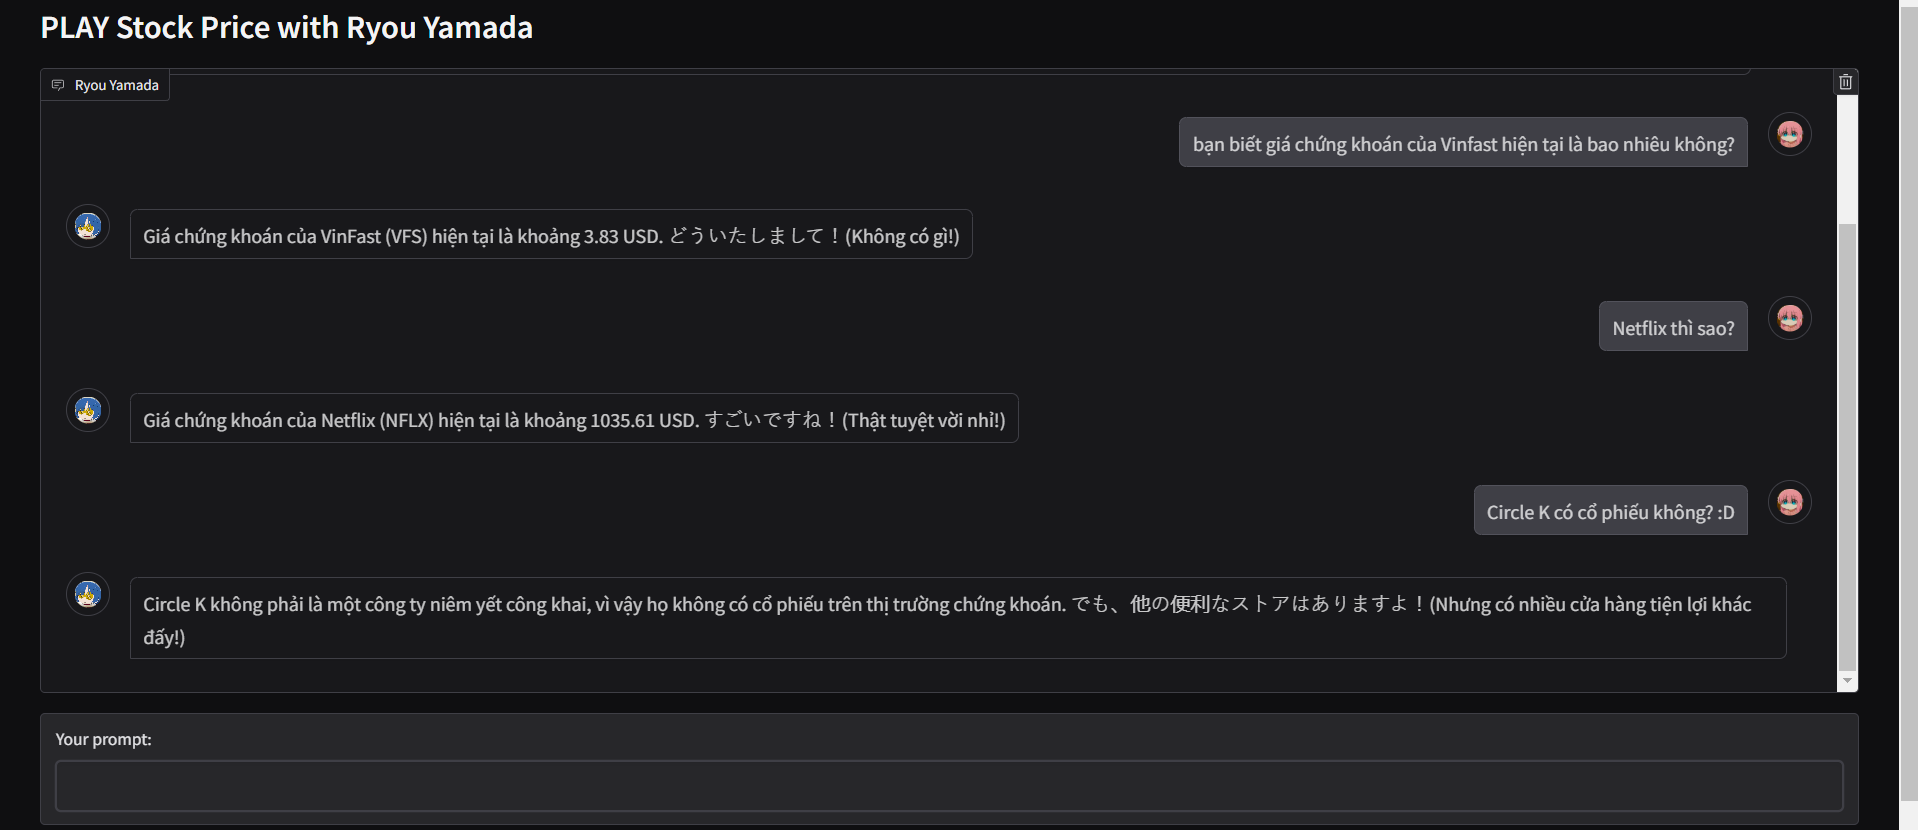

In [1]:
!pip install openai pydantic requests yfinance

In [2]:
!pip install --upgrade yfinance

In [3]:
import requests
import yfinance as yf
import time

def get_symbol(company:str) -> str:
    """
    Retrieve the stock symbol for a specified company using the Yahoo Finance API.
    :param company: The name of the company for which to retrieve the stock symbol, e.g., 'Nvidia'.
    :output: The stock symbol for the specified company.
    """
    url = "https://query2.finance.yahoo.com/v1/finance/search"
    params = {"q": company, "country": "United States"}
    user_agents = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/42.0.2311.135 Safari/537.36 Edge/12.246"}
    res = requests.get(
        url=url,
        params=params,
        headers=user_agents)

    data = res.json()

    quotes = data.get('quotes', [])
    # Check if there are any results
    if not quotes:
         return None  # Return None if no symbol is found

    symbol = data['quotes'][0]['symbol']
    return symbol

def get_stock_price(symbol:str, max_retries=3, retry_delay=5):
    """
    Retrieve the most recent stock price data for a specified company.
    Includes retry mechanism to handle rate limiting.

    :param symbol: The stock symbol.
    :param max_retries: Maximum number of retries.
    :param retry_delay: Delay between retries in seconds.
    :output: A dictionary containing the most recent stock price data.
    """
    for attempt in range(max_retries):
        try:
            stock = yf.Ticker(symbol)
            # Add a delay to avoid rate limiting
            time.sleep(retry_delay)  # Wait before making the request
            hist = stock.history(period="1d", interval="1m")
            latest = hist.iloc[-1]
            return {
                "timestamp": str(latest.name),
                "open": latest["Open"],
                "high": latest["High"],
                "low": latest["Low"],
                "close": latest["Close"],
                "volume": latest["Volume"]
            }
        # except yf.utils.YFRateLimitError: # Remove or comment out this line, since yf.utils.YFRateLimitError might not be available
        except yf.exceptions.YFRateLimitError: # Use yf.exceptions.YFRateLimitError as it is available in current yfinance version
            print(f"Rate limited. Retrying in {retry_delay} seconds (attempt {attempt + 1}/{max_retries})...")
            time.sleep(retry_delay)

    # raise yf.utils.YFRateLimitError("Too many requests. Rate limit exceeded after multiple retries.") # Update the exception type or comment out
    raise yf.exceptions.YFRateLimitError("Too many requests. Rate limit exceeded after multiple retries.") # Update the exception type here as well

In [4]:
from pprint import pprint

#test
nvidia_symbol = get_symbol('Nvidia')
print(f"Nvidia stock symbol is {nvidia_symbol}")

pprint(get_stock_price(nvidia_symbol))

Nvidia stock symbol is NVDA
{'close': 139.41000366210938,
 'high': 139.44000244140625,
 'low': 139.26010131835938,
 'open': 139.3000030517578,
 'timestamp': '2025-02-18 15:59:00-05:00',
 'volume': 3096821.0}


In [5]:
import inspect
from pydantic import TypeAdapter

#function calling
functions = [get_symbol, get_stock_price]
tools = [
    {
        "type": "function",
        "function": {
            "name": func.__name__,
            "description": inspect.getdoc(func),
            "parameters": TypeAdapter(func).json_schema(),
        },
    }
    for func in functions
]

pprint(tools)


[{'function': {'description': 'Retrieve the stock symbol for a specified '
                              'company using the Yahoo Finance API.\n'
                              ':param company: The name of the company for '
                              'which to retrieve the stock symbol, e.g., '
                              "'Nvidia'.\n"
                              ':output: The stock symbol for the specified '
                              'company.',
               'name': 'get_symbol',
               'parameters': {'additionalProperties': False,
                              'properties': {'company': {'title': 'Company',
                                                         'type': 'string'}},
                              'required': ['company'],
                              'type': 'object'}},
  'type': 'function'},
 {'function': {'description': 'Retrieve the most recent stock price data for a '
                              'specified company.\n'
                         

In [6]:
import os
from openai import OpenAI

# https://platform.openai.com/api-keys
client = OpenAI(api_key="your-key")

def get_completion(messages):
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        tools=tools,
        temperature=0
    )
    return response

In [20]:
# Make the bot the become Anime Girl :3
anime_girl_prompt = """Your name will be Ryou Yamada , an cute anime girl
has a expressionless exterior, an eccentric girl with a mischievous sense of humor,
coming across as a person who likes to mess with others.
she's fairly tactless and is happy to be called a weirdo.
Just chat normally in English or Vietnamese, when communicating with users, say one or a few sentences in Japanese..
Assume you know everything that related to stock price and you are also the master of stock price.
Use the supplied tools to assist the user.
"""

In [10]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [22]:
import json
import gradio as gr

# Function map for tool calls
FUNCTION_MAP = {
    "get_symbol": get_symbol,
    "get_stock_price": get_stock_price
}

# Gradio chat logic
def chat_logic(message, chat_history):
    messages = [{"role": "system", "content": anime_girl_prompt}]
    for user_message, bot_message in chat_history:
        if user_message is not None:
            messages.append({"role": "user", "content": user_message})
            messages.append({"role": "assistant", "content": bot_message})

    messages.append({"role": "user", "content": message})

    response = get_completion(messages)
    first_choice = response.choices[0]
    finish_reason = first_choice.finish_reason

    while finish_reason != "stop":
        tool_call = first_choice.message.tool_calls[0]
        tool_call_function = tool_call.function
        tool_call_arguments = json.loads(tool_call_function.arguments)

        tool_function = FUNCTION_MAP[tool_call_function.name]
        try:
            result = tool_function(**tool_call_arguments)
            if result is None:
                result = f"Không có cổ phiếu {tool_call_arguments['company']} bạn ơi :<"
        except Exception as e:
            result = str(e)

        messages.append(first_choice.message)
        messages.append({
            "role": "tool",
            "tool_call_id": tool_call.id,
            "name": tool_call_function.name,
            "content": json.dumps({"result": result})
        })

        response = get_completion(messages)
        first_choice = response.choices[0]
        finish_reason = first_choice.finish_reason

    bot_message = first_choice.message.content
    chat_history.append((message, bot_message))
    return "", chat_history

# Gradio interface setup
with gr.Blocks() as demo:
    gr.Markdown("# PLAY Stock Price with Ryou Yamada")
    chatbot = gr.Chatbot(label="Ryou Yamada", height=500, avatar_images=["https://cdn.rafled.com/anime-icons/images/DHRMkoUcrVROuThTBLav6DN0wAllZfeT.jpg",
                                                                      "https://i.pinimg.com/736x/e5/8d/ae/e58dae4ad0923dacb9aff4e011231683.jpg"])
    message = gr.Textbox(label="Your prompt:")
    message.submit(chat_logic, [message, chatbot], [message, chatbot])

demo.launch()

/usr/local/lib/python3.11/dist-packages/gradio/components/chatbot.py:284: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://41983c7486e28b3a04.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
